In [20]:
from pathlib import Path

# Get all the .txt files in the folder
file_paths = list(Path().glob('*.txt'))

# Load the contents and titles
screenplays = []
titles = []

for p in file_paths:
    with open(p, encoding='utf8', errors='ignore') as f:
        screenplays.append(f.read())
        titles.append(p.stem)  # filename without extension

# Confirm everything loaded
print(f"Loaded {len(screenplays)} romance novels.")
print("First 5 titles:")
for t in titles[:5]:
    print(t)


Loaded 193 romance novels.
First 5 titles:
familymanthe
broadcastnews
horsewhispererthe
prettywoman
princessbridethe


Loaded 193 romance novels into Jupyter.
Used pathlib to find all text files.
Opened each file and read the contents.
Stored full texts in screenplays list.
Saved file names as titles
Printed total count to check 193
Printed sample titles to check everything worked

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Set up CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_df=0.7, min_df=5)

# Apply vectorizer to the screenplays
X_counts = vectorizer.fit_transform(screenplays)

# Check matrix shape
print(f"Document-Term Matrix shape: {X_counts.shape}")


Document-Term Matrix shape: (193, 16863)


count vectorizer turned the text into numbers 
removes all the stop words 
ignored the common words 
martrix showing # of screenplay, and # of the unique words kept

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Trial 1 Vectorizer Settings
vectorizer = CountVectorizer(stop_words='english', max_df=0.5, min_df=10)
X_counts = vectorizer.fit_transform(screenplays)



starting to adjust the vectorizer


In [28]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda_model = LDA(n_components=10, random_state=42)
lda_model.fit(X_counts)

feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, 10)


0: sam 2885.27, jane 2706.8, jack 2006.62, carl 1461.27, kelly 926.18, patrick 908.91, molly 891.68, steven 870.86, sara 777.64, jake 527.26,
1: bob 1119.15, rose 1089.75, jerry 836.24, monica 804.46, eve 764.17, maggie 747.7, stew 722.51, ike 721.64, adam 661.57, burns 614.09,
2: frank 2849.47, jack 1552.29, rachel 1539.24, margaret 885.69, richard 880.12, paul 718.92, karen 675.29, sailor 610.11, victor 603.66, cher 535.81,
3: harry 3277.47, nick 1537.31, emma 1231.88, adam 1219.25, alice 1079.29, eric 982.94, carol 845.87, helen 726.56, gus 718.12, sarah 690.85,
4: joe 1383.86, kate 1313.27, william 1277.75, max 1089.07, peter 915.87, ryan 827.04, olive 770.11, harvey 700.89, storm 617.04, august 544.76,
5: michael 1853.68, walter 1202.51, mark 1176.8, anne 993.42, bloom 684.87, henry 476.68, stephen 424.93, continued 385.8, billy 355.43, kevin 300.06,
6: phil 2043.33, pat 1385.57, mary 1322.84, charlotte 1178.92, charlie 1036.59, rocky 838.8, rick 814.75, cindy 768.45, dean 765.46,

ran the lda and vectorizer got tons of proper nouns 

In [30]:
# Updated Vectorizer Settings
vectorizer = CountVectorizer(stop_words='english', max_df=0.4, min_df=15)
X_counts = vectorizer.fit_transform(screenplays)

# Re-run LDA
lda_model = LDA(n_components=10, random_state=42)
lda_model.fit(X_counts)

# Display results again
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, 10)


0: adam 1521.37, eve 962.56, kelly 943.07, captain 778.65, sam 756.93, romeo 632.18, james 464.37, carol 453.73, simon 431.95, scout 309.38,
1: jack 3978.74, rose 1616.91, eric 984.09, olive 780.76, karen 701.8, sarah 607.07, buddy 493.53, billy 466.5, andy 459.7, deck 414.59,
2: annie 2830.55, frank 2642.0, david 2249.28, sam 2180.97, patrick 1301.9, martin 668.03, alex 646.02, jack 510.52, continuing 394.07, april 372.58,
3: george 2126.78, william 1392.74, carl 1334.63, peter 1156.63, max 1135.85, anna 794.96, fred 523.17, dave 487.02, mary 442.38, charles 398.85,
4: ben 3031.52, charlie 2463.01, tom 2289.98, alice 1020.28, rob 945.52, pete 717.93, laura 380.86, tony 219.67, barry 213.27, johnny 187.09,
5: nick 1538.32, joe 1457.06, mickey 1354.44, bruce 1263.58, grace 1216.84, tin 878.33, rocky 819.6, larry 763.83, barry 704.78, burns 598.24,
6: phil 2052.22, continued 2019.46, michael 1783.78, richard 1050.11, dean 812.05, august 542.24, ok 302.35, larry 251.45, ruth 231.31, judge

increase min_df to remove rare names and lower max_df to catch the overused ones 
still seeing names but general words starting to show up 
need to filter more 

In [34]:
# Trial 3: More aggressive filtering
vectorizer = CountVectorizer(stop_words='english', max_df=0.4, min_df=25)
X_counts = vectorizer.fit_transform(screenplays)

lda_model = LDA(n_components=10, random_state=42)
lda_model.fit(X_counts)

feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, 10)


0: ben 3036.08, charlie 2464.37, pat 1387.15, larry 941.99, elizabeth 914.29, mercedes 302.85, pete 261.59, tony 245.03, knocked 152.14, mary 147.83,
1: continued 3621.84, martin 863.72, nurse 494.17, captain 379.08, film 316.53, paris 305.08, thomas 303.33, piano 299.31, patient 297.76, louis 289.45,
2: sam 3052.71, tom 2348.34, bob 1281.4, grace 1276.23, max 1061.57, interior 373.06, charles 342.64, robert 308.65, kit 304.37, captain 248.25,
3: harry 3456.06, richard 1022.72, eve 964.77, pete 488.04, lee 460.92, captain 337.47, thomas 312.53, overlapping 241.08, gesturing 235.1, penny 167.66,
4: joe 1583.65, william 1369.47, dick 485.39, penny 320.48, lane 99.41, cliff 97.01, lee 93.72, coach 77.13, fan 72.15, max 69.01,
5: frank 2875.34, michael 1831.97, burns 597.87, continuing 224.6, judge 216.95, tony 147.87, paul 134.3, smith 127.12, sheriff 105.44, steve 96.35,
6: george 2209.29, mary 2202.18, jerry 963.25, paul 959.02, tin 930.89, billy 453.22, henry 386.42, thomas 192.84, unc

min_df =25, max_df=.4 
remove more names and reveal more topics - film, coach, aiport, creature, etc
fewer proper nound and more common romance themes


In [36]:


# Trial 4: Even more aggressive filtering
vectorizer = CountVectorizer(stop_words='english', max_df=0.4, min_df=30)
X_counts = vectorizer.fit_transform(screenplays)

lda_model = LDA(n_components=10, random_state=42)
lda_model.fit(X_counts)

feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, 10)



0: jack 4518.2, frank 2876.62, rose 1761.35, interior 490.47, candy 314.01, exterior 307.42, boat 252.22, deck 238.95, continuing 184.27, tony 154.37,
1: ben 3046.36, jerry 976.68, pete 722.8, thomas 552.75, james 504.41, harry 229.36, knocked 147.26, ray 117.41, continuing 102.52, sugar 100.67,
2: continued 3765.74, harry 3070.65, bob 1410.95, elizabeth 904.62, ok 534.74, billy 279.89, van 260.98, script 254.06, nurse 232.63, manager 216.14,
3: david 2592.87, joe 1568.83, golf 92.23, cabin 72.4, iron 68.33, tower 66.22, pilot 63.29, airplane 56.99, range 56.28, gallery 52.17,
4: buddy 495.13, charles 436.91, film 353.34, cop 345.58, creature 315.24, captain 287.41, highway 280.78, henry 268.41, ship 248.18, bird 218.11,
5: charlie 2491.97, pat 1391.72, paul 1055.31, burns 605.38, dick 314.46, tony 275.46, elizabeth 139.27, cliff 112.9, customer 58.94, aunt 45.19,
6: tom 2353.82, eve 921.55, rocky 828.61, mask 277.62, gesturing 224.87, robert 200.96, paul 165.84, continuing 135.47, fil

finally a better mix 
thematic words showing up
min_df=30, max_df=.4
proper nouns finally the minority woohoo

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Minimal TF-IDF setup for romance novels
vectorizer = TfidfVectorizer(lowercase=True,
                             min_df=2,
                             stop_words='english')

# Fit the model to your screenplays (romance novels)
dtm = vectorizer.fit_transform(screenplays)

# Grab feature names for topic display later
vocabulary = vectorizer.get_feature_names_out()

# See the shape of your DTM
dtm.shape


(193, 31090)

converted my romance corpus into a tf-idf 
shows how many documents im working with 
ready to plyg into NMF model


In [46]:
from sklearn.decomposition import NMF

# Fit NMF model on romance TF-IDF data
nmf = NMF(n_components=16, 
          random_state=1, 
          max_iter=500, 
          init='nndsvd').fit(dtm)

# Get document-topic and topic-word matrices
nmf_W = nmf.transform(dtm)
nmf_H = nmf.components_

# Check shape of document-topic matrix
nmf_W.shape


(193, 16)

NMF found 16 topics -- due to n_components=16
nmf_w= topics each belongs to 
nmf_h= words define each topic 

In [50]:
display_topics(nmf, vocabulary, 10)

0: george 0.38, int 0.38, day 0.33, like 0.27, don 0.26, know 0.26, ext 0.25, night 0.25, man 0.24, just 0.23,
1: annie 1.19, tom 0.2, crash 0.18, jonah 0.17, grace 0.16, pilgrim 0.09, know 0.08, robert 0.08, max 0.07, skip 0.07,
2: bella 1.11, jacob 0.45, edward 0.39, charlie 0.19, william 0.17, alice 0.13, cal 0.1, anna 0.09, cullen 0.09, august 0.08,
3: jack 1.08, frank 0.55, kate 0.4, susie 0.25, gump 0.22, ali 0.22, rose 0.21, rachel 0.21, cal 0.18, april 0.15,
4: jane 1.39, tom 0.46, aaron 0.37, rochester 0.33, jake 0.31, eyre 0.12, elizabeth 0.11, bennet 0.11, fairfax 0.11, darcy 0.11,
5: harry 1.57, shelly 0.52, joan 0.43, erica 0.42, helen 0.4, lena 0.26, juno 0.25, luke 0.23, ernesto 0.21, thomas 0.17,
6: phil 0.94, clara 0.34, rita 0.28, bob 0.27, betty 0.25, waverly 0.16, judy 0.11, charlotte 0.1, med 0.09, martha 0.06,
7: sam 1.0, charlie 0.39, molly 0.24, carl 0.23, mae 0.22, rob 0.22, suzy 0.21, large 0.21, ali 0.16, mark 0.15,
8: david 1.3, alex 0.35, elise 0.34, sofia 

ran NMF topic model using n componet 
each line is one topic 
words = what the topic is about 
still seeing proper nouns 

In [52]:
# IMPORT
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Jupyter magic for inline plots
%matplotlib inline

# Set plot style
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 300


setting up for plot 

In [57]:
wcss = [] 
for i in range(1, 30): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dtm) 
    wcss.append(kmeans.inertia_)

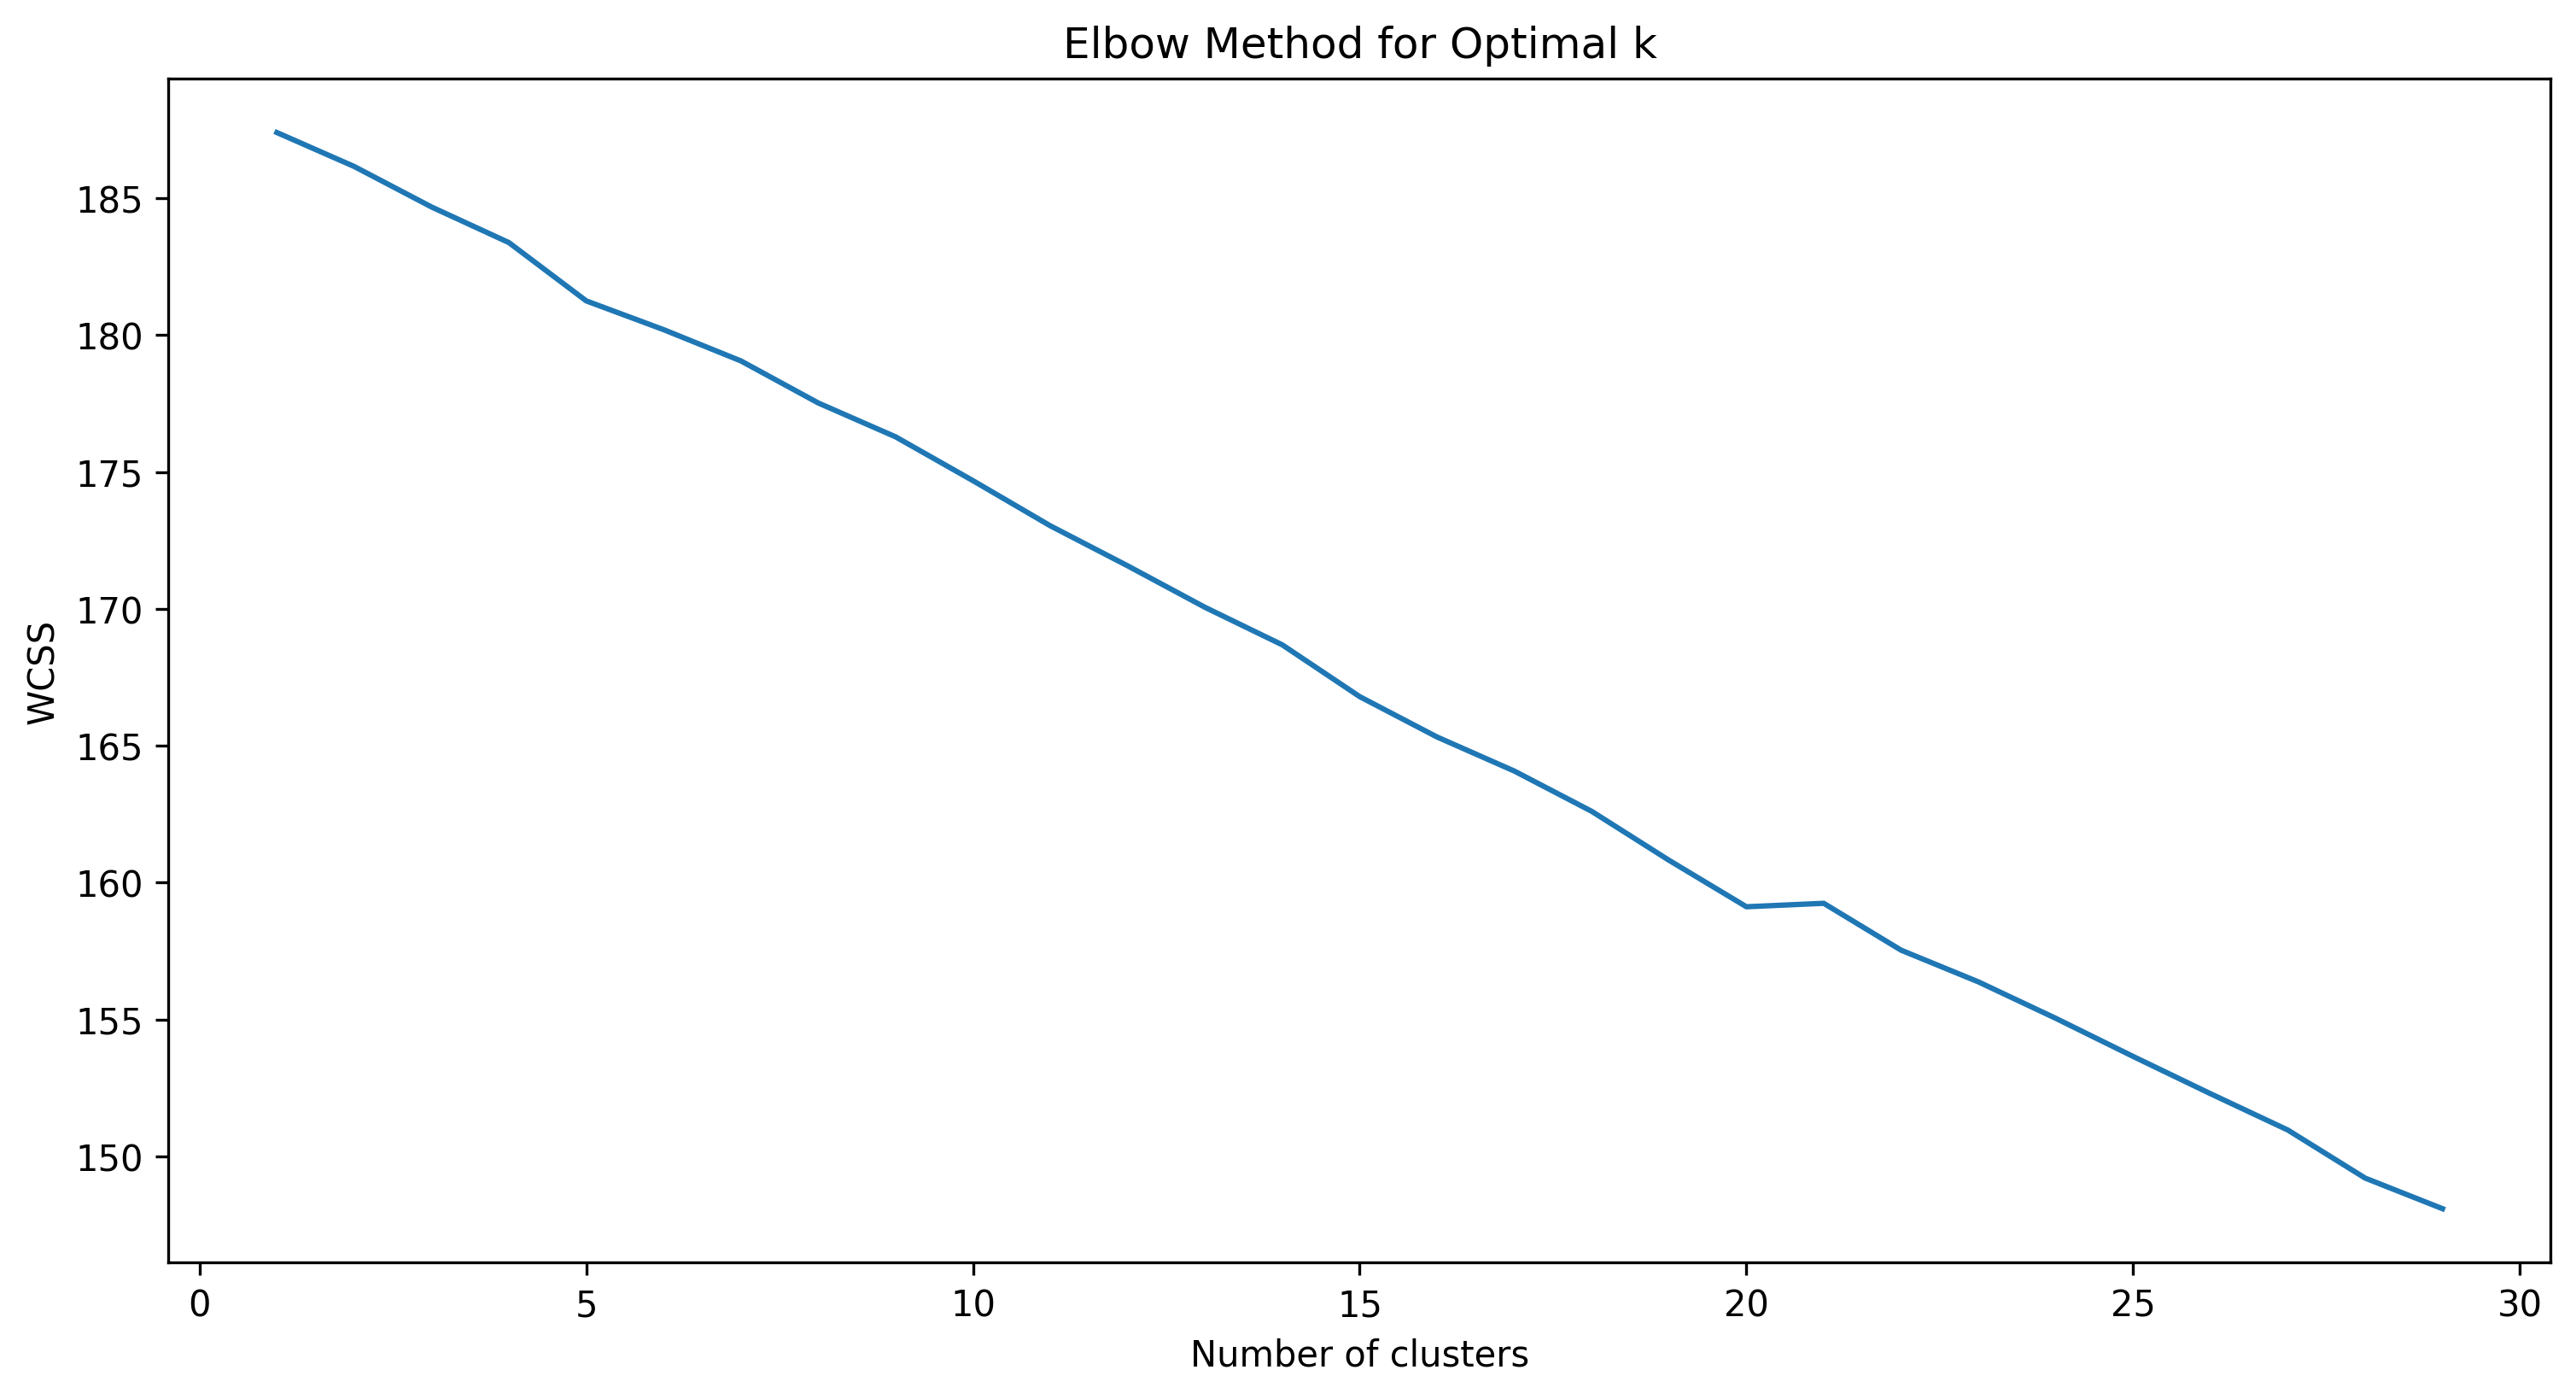

In [59]:
plt.plot(range(1, 30), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


used tf-idf matrix of romance novels 
kmeans clusters from 1 to 30 
wcss decrease as cluster increases 
elbow point is 10-12

used 193 romance novels to explore topic modeling using LDA and NMF 
LDA topic modeling -- count vectorizer: used countvectorizer with min_df and max_df and did it multiple times - best one was min 30 and max .4
NMF - used tfidvectorizer and fit with 16 topics using the n components - re run with hgiher min df to, TF-IDf highlighted words specific to each romance book
estimation process - kmeans using Tf-idf, ran the elbow method for clustering 
